In [1]:
import pandas as pd 
df=pd.read_csv('healthcare_dataset.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [21]:
df

,Name,Age,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Billing Amount,Room Number,Discharge Date,...,Admission Type_Emergency,Admission Type_Urgent,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test Results_Abnormal,Test Results_Inconclusive,Test Results_Normal
0,0.061371,0.223684,0.714286,0.4,0.946878,0.659693,0.750671,0.380933,0.568922,0.932615,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.304275,0.644737,0.000000,1.0,0.056955,0.834110,0.401555,0.650904,0.411028,0.058760,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.129543,0.828947,0.142857,1.0,0.675246,0.937729,0.137254,0.547053,0.260652,0.672237,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.538797,0.197368,0.857143,0.6,0.306681,0.558032,0.308890,0.728798,0.874687,0.317520,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.524914,0.394737,0.285714,0.4,0.673604,0.526996,0.842583,0.296622,0.894737,0.673315,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,0.648437,0.381579,0.857143,0.2,0.255203,0.495860,0.390044,0.085064,0.791980,0.266846,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
55496,0.273769,0.631579,0.428571,1.0,0.142388,0.920897,0.795536,0.611002,0.538847,0.144474,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55497,0.174871,0.328947,0.571429,0.8,0.236583,0.459841,0.938132,0.540949,0.616541,0.247439,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
55498,0.195215,0.394737,1.000000,0.0,0.009310,0.561849,0.359348,0.629137,0.551378,0.011860,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# Classes


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

class Datapreprocessing:
    def __init__(self, df):
        self.df = df.copy()
    
    # Handle missing values
    def tozala(self):
        for col in self.df.columns:
            if self.df[col].isnull().any():
                if self.df[col].dtype == 'object':
                    self.df[col].fillna(self.df[col].mode()[0], inplace=True)
                else:
                    self.df[col].fillna(self.df[col].mean(), inplace=True)
        return self
    
    # Encode categorical variables
    def encodla(self):
        encoder = LabelEncoder()
        for col in self.df.columns:
            if self.df[col].dtype == 'object':
                if self.df[col].nunique() <= 5:  # few categories → OneHot
                    dummies = pd.get_dummies(self.df[col], prefix=col, dtype=int)
                    self.df = pd.concat([self.df.drop(columns=[col]), dummies], axis=1)
                else:  # many categories → Label Encoding
                    self.df[col] = encoder.fit_transform(self.df[col])
        return self
    
    # Scale numeric features
    def scale_qil(self):
        scaler = MinMaxScaler()
        num_cols = self.df.select_dtypes(include=['int64', 'float64']).columns.drop('xG', errors='ignore')
        self.df[num_cols] = scaler.fit_transform(self.df[num_cols])
        return self
    
    # Log transformation for skewed features
    def log_transform(self, threshold=0.5):
        skewness = self.df.skew()
        features_log = skewness[(skewness >= threshold)].index.tolist()
        
        for col in features_log:
            if (self.df[col] > 0).all():  # only positive values
                self.df[col] = np.log1p(self.df[col])
        return self


In [4]:
processor = Datapreprocessing(df)

df_ready = (
    processor
    .tozala()
    .encodla()
    .scale_qil()
    .log_transform()
    .df
)

print(df_ready.head())


       Name       Age  Blood Type  Medical Condition  Date of Admission  \
0  0.061371  0.223684    0.714286                0.4           0.946878   
1  0.304275  0.644737    0.000000                1.0           0.056955   
2  0.129543  0.828947    0.142857                1.0           0.675246   
3  0.538797  0.197368    0.857143                0.6           0.306681   
4  0.524914  0.394737    0.285714                0.4           0.673604   

     Doctor  Hospital  Billing Amount  Room Number  Discharge Date  ...  \
0  0.659693  0.750671        0.380933     0.568922        0.932615  ...   
1  0.834110  0.401555        0.650904     0.411028        0.058760  ...   
2  0.937729  0.137254        0.547053     0.260652        0.672237  ...   
3  0.558032  0.308890        0.728798     0.874687        0.317520  ...   
4  0.526996  0.842583        0.296622     0.894737        0.673315  ...   

   Admission Type_Emergency  Admission Type_Urgent  Medication_Aspirin  \
0                       

In [5]:
df=df_ready

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Name                                 55500 non-null  float64
 1   Age                                  55500 non-null  float64
 2   Blood Type                           55500 non-null  float64
 3   Medical Condition                    55500 non-null  float64
 4   Date of Admission                    55500 non-null  float64
 5   Doctor                               55500 non-null  float64
 6   Hospital                             55500 non-null  float64
 7   Billing Amount                       55500 non-null  float64
 8   Room Number                          55500 non-null  float64
 9   Discharge Date                       55500 non-null  float64
 10  Gender_Female                        55500 non-null  float64
 11  Gender_Male                 

# Filter Methods

In [ ]:
# Correlation
import numpy as np   # Numpy kutubxonasini import qilamiz (matematik amallar uchun kerak bo‘ladi)

# Korrelatsiya matritsasini hisoblash va modul qiymatini olish
corr_matrix = df.corr().abs()  
# df.corr() → DataFrame ustunlari orasidagi korrelatsiyani (Pearson) hisoblaydi
# .abs() → manfiy qiymatlarni ham musbatga aylantiradi (faqat bog‘lanish kuchi kerak bo‘ladi)

# Korrelatsiya matritsasining yuqori uchburchagini olish (faqat ustunlar orasidagi takrorlanmagan qism kerak)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  
# np.ones(corr_matrix.shape) → korrelatsiya matritsasi o‘lchamida 1’lardan iborat matritsa hosil qiladi
# np.triu(..., k=1) → faqat yuqori uchburchak (diagonal ustidan boshlab) qismi 1 bo‘ladi, pastki qismi 0
# .astype(bool) → True/False ga aylantirish
# .where(...) → yuqori uchburchak joylarida qiymatni qoldiradi, boshqa joylarni NaN qiladi

# 0.8 dan katta korrelatsiyaga ega bo‘lgan ustunlarni aniqlash
to_drop = [col for col in upper.columns if any(upper[col] > 0.8)]  
# upper[col] > 0.8 → shu ustunning boshqa ustunlar bilan korrelatsiyasini tekshiradi
# any(...) → agar bitta bo‘lsa ham 0.8 dan katta bo‘lsa → True
# col → bunday ustunlar ro‘yxatiga qo‘shiladi
# Natijada, o‘zaro yuqori korrelyatsiyaga ega bo‘lgan ustunlarning nomlari chiqadi

# Yuqori korrelyatsiyaga ega ustunlarni olib tashlash
df_filtered = df.drop(columns=to_drop)  
# df.drop(columns=to_drop) → yuqori bog‘langan ustunlarni olib tashlagan yangi DataFrame yaratadi

# Natijalarni chop qilish
print("\nOriginal shape:", df.shape)  
# df.shape → asl DataFrame’ning o‘lchamini (qatorlar soni, ustunlar soni) chiqaradi

print("Shape after dropping correlated features:", df_filtered.shape)  
# df_filtered.shape → korrelyatsiya asosida ustunlar olib tashlangandan keyingi o‘lcham



Original shape: (55500, 28)
Shape after dropping correlated features: (55500, 26)


📌 Umumiy ma’nosi:
Bu kod DataFrame’dagi ustunlar orasidagi yuqori korrelatsiyali (bog‘lanishi juda kuchli, >0.8) ustunlarni olib tashlash uchun ishlatiladi. Bu ML modelda multicollinearity (ko‘p yo‘nalishli bog‘liqlik) muammosini kamaytirishga yordam beradi.

In [8]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Name                                 55500 non-null  float64
 1   Age                                  55500 non-null  float64
 2   Blood Type                           55500 non-null  float64
 3   Medical Condition                    55500 non-null  float64
 4   Date of Admission                    55500 non-null  float64
 5   Doctor                               55500 non-null  float64
 6   Hospital                             55500 non-null  float64
 7   Billing Amount                       55500 non-null  float64
 8   Room Number                          55500 non-null  float64
 9   Gender_Female                        55500 non-null  float64
 10  Insurance Provider_Aetna             55500 non-null  float64
 11  Insurance Provider_Blue Cros

In [ ]:
# More analysis
import seaborn as sns                # seaborn → vizualizatsiya (chiroyli grafiklar) uchun kutubxona
import matplotlib.pyplot as plt      # matplotlib.pyplot → grafik chizish uchun kutubxona

# Korrelatsiya matritsasini hisoblash va modul qiymatini olish
corr_matrix = df.corr().abs()  
# df.corr() → ustunlar orasidagi korrelatsiyani hisoblaydi (Pearson default)
# .abs() → qiymatlarni modulga aylantiradi (manfiy bo‘lsa ham musbat bo‘ladi)

# Yuqori uchburchak matritsasini olish (takroriy qiymatlarni yo‘qotish uchun)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  
# np.ones(corr_matrix.shape) → korrelatsiya matritsasining o‘lchamida faqat 1’lardan iborat matritsa
# np.triu(..., k=1) → faqat yuqori uchburchak qismi 1 bo‘ladi, pastki qismi 0
# .astype(bool) → 1 → True, 0 → False qilib o‘zgartiradi
# corr_matrix.where(...) → faqat True bo‘lgan joylarni qoldiradi, qolganlari NaN bo‘ladi
# Shunday qilib, korrelatsiya matritsasining **yuqori qismi** qoladi (takroriy pastki qismini olib tashlaydi)

# Kuchsiz emas, balki yuqori korrelatsiyali ustunlarni aniqlash
to_drop = [col for col in upper.columns if any(upper[col] > 0.8)]  
# upper[col] > 0.8 → shu ustun boshqa ustunlar bilan qanchalik bog‘langanini tekshiradi
# any(...) → agar bitta bo‘lsa ham 0.8 dan katta korrelatsiya bo‘lsa → True
# col → bunday ustun nomlarini list’ga qo‘shadi
# Natijada, yuqori bog‘langan ustunlarning nomlari chiqadi


In [ ]:
# DataFrame ustunlari orasidagi korrelatsiya matritsasini hisoblash va modul qiymatini olish
corr_matrix = df.corr().abs()  

# df.corr() → DataFrame’dagi barcha sonli ustunlar orasida **korrelatsiyani** hisoblaydi  
#              (default – Pearson korrelatsiyasi).  
#              Natija: kvadrat matritsa (ustunlar va ustunlar orasidagi bog‘liqlik).  
#
# .abs()      → Korrelatsiya -1 dan 1 gacha qiymat oladi.  
#              -1 yoki 1 → kuchli bog‘lanish,  
#              0 → bog‘lanish yo‘q.  
#              Ba’zida bizga faqat kuchi kerak bo‘ladi, shuning uchun **modul qiymat** olinadi  
#              (ya’ni manfiy belgilar yo‘qoladi, -0.9 → 0.9).  
#
# Natija: faqat musbat qiymatlardan iborat korrelatsiya matritsasi.

# Korrelatsiya matritsasini chop etish
print(corr_matrix)  

# Bu qator butun korrelatsiya matritsasini chiqarib beradi.  
# Jadval ko‘rinishida: diagonali 1 (har bir ustun o‘zi bilan 100% bog‘liq).  
# Qolgan joylarda ustunlar orasidagi bog‘liqlik ko‘rsatiladi.


                                         Name       Age  Blood Type  \
Name                                 1.000000  0.001327    0.001247   
Age                                  0.001327  1.000000    0.000402   
Blood Type                           0.001247  0.000402    1.000000   
Medical Condition                    0.003205  0.002809    0.004616   
Date of Admission                    0.003024  0.000367    0.000428   
Doctor                               0.005388  0.003110    0.005388   
Hospital                             0.003625  0.002232    0.000229   
Billing Amount                       0.001627  0.003832    0.001152   
Room Number                          0.001307  0.000720    0.004261   
Discharge Date                       0.003046  0.000232    0.000460   
Gender_Female                        0.007901  0.002002    0.000839   
Gender_Male                          0.007901  0.002002    0.000839   
Insurance Provider_Aetna             0.002253  0.003422    0.004144   
Insura

In [ ]:
# Yuqori korrelyatsiyaga ega juftliklarni saqlash uchun bo‘sh ro‘yxat yaratamiz
high_corr_pairs = []

# Matritsaning ustunlari bo‘yicha aylanish (kolonlar)
for col in upper.columns:
    # Matritsaning qatorlari bo‘yicha aylanish (indekslar)
    for row in upper.index:
        # Agar qiymat NaN emas va korrelyatsiya 0.85 dan katta bo‘lsa
        if upper.loc[row, col] is not np.nan and upper.loc[row, col] > 0.85:
            # Ustun va qator nomini, hamda korrelyatsiya qiymatini (2 xonali yaxlitlangan holda) qo‘shamiz
            high_corr_pairs.append([row, col, round(upper.loc[row, col], 2)])

# Yuqori korrelyatsiyali juftliklardan jadval (DataFrame) hosil qilamiz
corr_table = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

# Natijani ekranga chiqaramiz
print("Highly correlated feature pairs (correlation > 0.8):")
print(corr_table)


Highly correlated feature pairs (correlation > 0.8):
           Feature 1       Feature 2  Correlation
0  Date of Admission  Discharge Date          1.0
1      Gender_Female     Gender_Male          1.0


In [ ]:
# Yuqori korrelyatsiyaga ega ustunlarni olib tashlash
df_filtered = df.drop(columns=to_drop)  
# df.drop(columns=to_drop) → DataFrame’dan `to_drop` ro‘yxatida keltirilgan ustunlarni olib tashlaydi
# Natija: yangi DataFrame (`df_filtered`) hosil bo‘ladi, lekin asl df o‘zgarmaydi

# Asl DataFrame o‘lchamini (qatorlar soni, ustunlar soni) chop qilish
print("\nOriginal shape:", df.shape)  
# df.shape → tuple qaytaradi: (qatorlar soni, ustunlar soni)
# "\n" → chop etishdan oldin yangi qatordan boshlash uchun ishlatilgan

# Yuqori korrelyatsiyali ustunlar olib tashlangandan keyingi o‘lchamni chop qilish
print("Shape after dropping correlated features:", df_filtered.shape)  
# df_filtered.shape → endi ustunlar soni kamaygan bo‘ladi
# Bu natija orqali nechta ustun olib tashlanganini solishtirish mumkin



Original shape: (55500, 28)
Shape after dropping correlated features: (55500, 26)


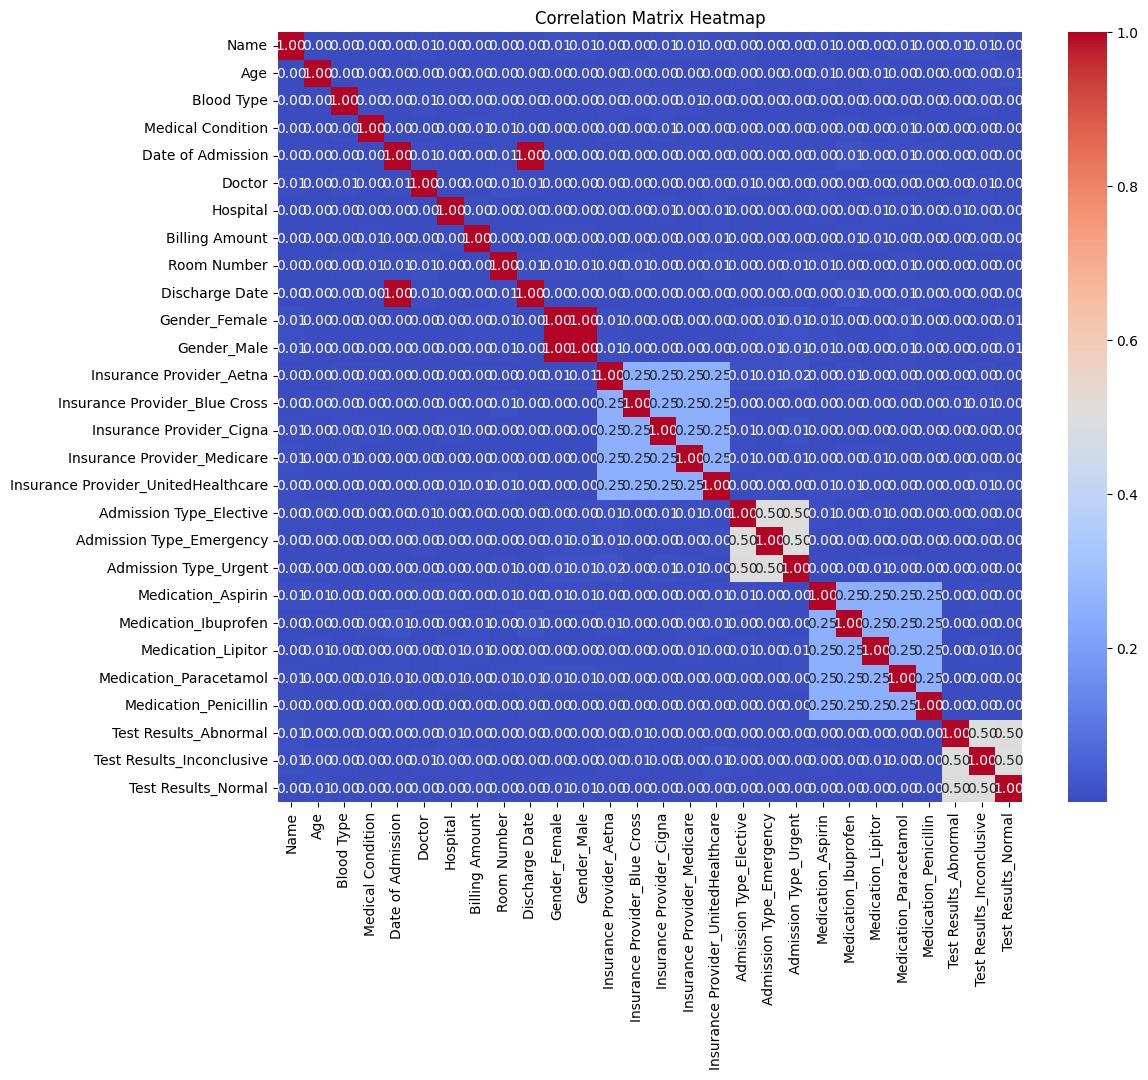

In [ ]:
# Grafik oynasini yaratish va o‘lchamini belgilash (eni=12, bo‘yi=10)
plt.figure(figsize=(12, 10))  
# Bu grafikning umumiy o‘lchamini sozlaydi (inchlarda)

# Seaborn yordamida korrelyatsiya matritsasini heatmap tarzida chizish
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)  
# corr_matrix → oldin hisoblangan korrelyatsiya matritsasi
# annot=True   → har bir katak ichida raqam (korrelatsiya qiymati) ko‘rsatiladi
# fmt=".2f"    → raqamlarni 2 xonali kasr bilan formatlaydi (masalan, 0.87)
# cmap="coolwarm" → rang sxemasi (sovuqdan issiqqa o‘tuvchi ranglar: ko‘k→qizil)
# cbar=True    → yon tomonda rang shkalasi (color bar) chiqadi

# Grafik sarlavhasini qo‘shish
plt.title("Correlation Matrix Heatmap")  
# Grafikning yuqorisida nom chiqaradi

# Grafikni ekranga chiqarish
plt.show()  
# Grafikni ko‘rsatadi (Jupyter Notebook yoki Python muhiti orqali)


In [ ]:
import plotly.express as px  
# Plotly Express kutubxonasini import qilamiz.
# U interaktiv grafiklar (heatmap, scatter, bar va boshqalar) yaratish uchun ishlatiladi.

# Create a long-form dataframe for Plotly
# Plotly uchun "long-form" (uzun shakldagi) DataFrame yaratish
corr_long = corr_matrix.reset_index().melt(id_vars='index')  
# corr_matrix.reset_index() → korrelyatsiya matritsasining indeksini (ustun nomlari) alohida ustunga o‘tkazadi.  
# .melt(id_vars='index')   → keng formatdagi jadvalni uzun formatga aylantiradi, 
# ya’ni har bir ustun-ustun juftligi uchun alohida qator hosil qiladi.
corr_long.columns = ['Feature 1', 'Feature 2', 'Correlation']  
# Ustun nomlarini yanada tushunarli qilib o‘zgartiramiz:  
# Feature 1 → birinchi ustun,  
# Feature 2 → ikkinchi ustun,  
# Correlation → ular orasidagi korrelatsiya qiymati.

# Plotly Express yordamida interaktiv korrelyatsiya heatmap chizish
fig = px.imshow(
    corr_matrix,                  # korrelatsiya matritsasini grafik uchun uzatamiz
    text_auto='.2f',              # kataklarda qiymatlarni 2 xonali kasr bilan chiqaradi (masalan, 0.87)
    aspect="auto",                # kataklarning nisbatini avtomatik sozlaydi
    color_continuous_scale='RdBu_r',  # rang palitrasi: qizil→salbiy, ko‘k→musbat (teskari)
    zmin=-1, zmax=1,              # rang shkalasini -1 dan 1 gacha belgilash (korrelatsiya diapazoni)
    title="Correlation Matrix Heatmap (Interactive)"  # grafik sarlavhasi
)

# Grafikning tashqi ko‘rinishini sozlash
fig.update_layout(
    width=900,           # grafik eni (pikselda)
    height=800,          # grafik bo‘yi (pikselda)
    xaxis_title="Features",  # X o‘qi nomi (ustunlar nomi)
    yaxis_title="Features"   # Y o‘qi nomi (ustunlar nomi)
)

fig.show()
# Grafikni ko‘rsatadi.
# Natija: interaktiv heatmap — katak ustiga sichqoncha olib borilganda qiymat ko‘rinadi,
# zoom qilish, aylantirish va boshqa interaktiv funksiyalar ishlaydi.


In [ ]:
# Low Variance
from sklearn.feature_selection import VarianceThreshold  
# sklearn kutubxonasidan VarianceThreshold klassini import qilamiz.
# Bu klass ustunlardagi varians (tarqalish) qiymati past bo‘lgan ustunlarni aniqlash uchun ishlatiladi.

# Varians uchun chegara qiymatini belgilash (masalan, 0.01)
threshold = 0.01  
# Agar ustunning variansi 0.01 dan kichik bo‘lsa, u "kam variansli" deb hisoblanadi.
# Kam varians → ustun deyarli o‘zgarmaydi (masalan, barcha qiymatlar bir xil yoki juda o‘xshash).

# VarianceThreshold obyektini yaratish
selector = VarianceThreshold(threshold=threshold)  
# threshold parametrini yuqorida belgilangan qiymatga teng qilib qo‘yamiz.
# Bu obyekt yordamida biz DataFrame ustunlarini filtrlashimiz mumkin.


# Dataset ustida modelni o‘rgatish (faqat variansni hisoblaydi)
selector.fit(df_filtered)  
# df_filtered → korrelyatsiyadan keyin qolgan DataFrame.
# Bu qadamda sklearn har bir ustunning variansini hisoblaydi va
# uni belgilangan threshold bilan taqqoslaydi.


# Kam variansga ega ustunlarni aniqlash
low_variance_features = df_filtered.columns[~selector.get_support()]  
# selector.get_support() → True/False massiv qaytaradi:
#     True  → ustun saqlanadi (variansi yuqori)
#     False → ustun olib tashlanadi (variansi past)
# ~ belgisini qo‘llash → False ni True ga aylantiradi (ya’ni olib tashlanishi kerak bo‘lganlarni tanlaydi).
# Natija: past variansli ustunlarning nomlari chiqadi.


# Past variansli ustunlarni olib tashlash
df_low_variance_filtered = df_filtered.drop(columns=low_variance_features)  
# DataFrame’dan aniqlangan past variansli ustunlar olib tashlanadi.
# Yangi DataFrame → df_low_variance_filtered


print("\nOriginal shape:", df_filtered.shape)  
# Korrelyatsiyadan keyin qolgan DataFrame’ning o‘lchamini chiqaradi (qatorlar soni, ustunlar soni).

print("Shape after dropping low-variance features:", df_low_variance_filtered.shape)  
# Past variansli ustunlarni olib tashlaganidan keyin yangi o‘lchamni chiqaradi.


Features with low variance (to drop): []

Original shape: (55500, 26)
Shape after dropping low-variance features: (55500, 26)


In [ ]:
# Past variansli ustunlarni aniqlash:
# selector.get_support() -> True/False massiv qaytaradi (True = ustun saqlanadi, False = olib tashlanadi)
# ~ belgisidan foydalansak, qiymatlar teskarilanadi (True = olib tashlanishi kerak bo‘lgan ustunlar)
low_variance_features = df_filtered.columns[~selector.get_support()]

# Past variansli ustunlarning nomlarini ro‘yxat shaklida ekranga chiqaramiz
print("Features with low variance (to drop):", list(low_variance_features))

Features with low variance (to drop): []


In [ ]:
# Faqat sonli ustunlarni tanlab olamiz
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Har bir sonli ustun uchun variansani hisoblaymiz
variances = df[numeric_cols].var()

# Past variansa uchun threshold belgilaymiz (masalan: 0.01)
threshold = 0.01

# Threshold’dan kichik bo‘lgan variansali ustunlarni topamiz
low_variance_features = variances[variances < threshold].index.tolist()

# Natijani DataFrame ko‘rinishida saqlaymiz
# Feature -> ustun nomi
# Variance -> ustunning varians qiymati
# LowVariance -> agar ustun past variansli bo‘lsa 'Yes', aks holda 'No'
var_df = pd.DataFrame({
    'Feature': variances.index,
    'Variance': variances.values,
    'LowVariance': ['Yes' if f in low_variance_features else 'No' for f in variances.index]
})

# Plotly Express yordamida bar chart (ustunli grafik) chizamiz
fig = px.bar(
    var_df,
    x='Feature',        # x o‘qi – ustun nomlari
    y='Variance',       # y o‘qi – varians qiymati
    color='LowVariance',  # rang past variansli yoki yo‘qligiga qarab belgilanadi
    color_discrete_map={'Yes': 'red', 'No': 'blue'},  # Yes -> qizil, No -> ko‘k
    text='Variance',    # ustun ustiga varians qiymatini yozib qo‘yish
    title='Feature Variance (Low-Variance Highlighted in Red)'  # grafik sarlavhasi
)

# Grafikni sozlash: x o‘qi yozuvlarini 45° buramiz, grafik o‘lchamini belgilaymiz
fig.update_layout(
    xaxis_tickangle=-45,
    width=1000,
    height=600
)

# Grafikni ko‘rsatish
fig.show()

In [18]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Name                                 55500 non-null  float64
 1   Age                                  55500 non-null  float64
 2   Blood Type                           55500 non-null  float64
 3   Medical Condition                    55500 non-null  float64
 4   Date of Admission                    55500 non-null  float64
 5   Doctor                               55500 non-null  float64
 6   Hospital                             55500 non-null  float64
 7   Billing Amount                       55500 non-null  float64
 8   Room Number                          55500 non-null  float64
 9   Gender_Female                        55500 non-null  float64
 10  Insurance Provider_Aetna             55500 non-null  float64
 11  Insurance Provider_Blue Cros

In [ ]:
#Drop qilinishi kerak

In [22]:
# Recursive Feature Elimination (RFE) uchun kerakli kutubxonalarni chaqirib olamiz
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Ma'lumotlarni X va y ga ajratamiz:
# X - xususiyatlar (features), ya'ni 'Medical Condition' dan tashqari barcha ustunlar
X = df.drop('Medical Condition', axis=1)

# y - target (maqsadli ustun), ya'ni 'xG'
y = df['Medical Condition']


In [ ]:
# Oddiy chiziqli regressiya modelini yaratamiz (bu model RFE uchun asos bo'ladi)
model = LinearRegression()

# RFE (Recursive Feature Elimination) obyektini yaratamiz
# Bu yerda model sifatida LinearRegression ishlatiladi
# n_features_to_select=10 -> eng yaxshi 10 ta xususiyat (feature) tanlab olinadi
rfe = RFE(model, n_features_to_select=10)

# RFE ni X va y ma'lumotlari bo'yicha o'rgatamiz
# Bu jarayonda RFE iterativ ravishda eng kam ahamiyatli xususiyatlarni olib tashlaydi
rfe.fit(X, y)

# Tanlab olingan xususiyatlarni olish:
# rfe.support_ -> True/False massiv qaytaradi (True = tanlangan feature)
selected_features = X.columns[rfe.support_]

# Eng yaxshi tanlangan featurelarni chiqaramiz
print("Selected features:", selected_features)


Selected features: Index(['Name', 'Age', 'Blood Type', 'Date of Admission', 'Billing Amount',
       'Room Number', 'Discharge Date', 'Insurance Provider_Cigna',
       'Insurance Provider_UnitedHealthcare', 'Medication_Paracetamol'],
      dtype='object')


In [24]:
# --- Embedded Methods ---
# Xususiyat tanlash uchun Linear Model'larda ishlatiladigan usul (LASSO regression)

# LassoCV (L1-regularizatsiya) ni import qilamiz
# CV - cross-validation, u model uchun optimal alpha (regulyarizatsiya kuchi) tanlab beradi
from sklearn.linear_model import LassoCV

# X = Featurelar (kiruvchi ma'lumotlar), ya'ni 'Medical Condition' ustunidan tashqari barcha ustunlar
X = df.drop('Medical Condition', axis=1)

# y = Target (chiqish qiymati), ya'ni 'Medical Condition' ustuni
y = df['Medical Condition']

# LassoCV modelini yaratib, uni darhol X va y ma'lumotlariga o'rgatamiz
# cv=10 -> 10-fold cross-validation ishlatiladi
# random_state=42 -> natijalarni qayta ishlab bo‘lganda bir xil chiqishi uchun
lasso = LassoCV(cv=10, random_state=42).fit(X, y)

# Olingan koeffitsientlarning qiymatini absolut qilib olamiz
# Chunki LASSO ba'zi koeffitsientlarni 0 ga tenglashtirib tashlaydi (ahamyatsiz xususiyatlar)
# Qolganlar esa ahamiyat darajasini ko'rsatadi
importance = np.abs(lasso.coef_)

c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.592246516956948, tolerance: 0.58360598198198

c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 54.50868663179335, tolerance: 0.58360598198198

c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 110.05699002896108, tolerance: 0.58360598198198

c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_c

In [25]:
# LASSO modelida nol bo'lmagan koeffitsientlarga ega bo'lgan ustunlarni tanlab olamiz
# importance > 0 -> faqat ahamiyatli (muqim) ustunlarni olib qoladi
selected_features = X.columns[importance > 0]

# Natijani chiqaramiz: LASSO orqali tanlangan ustunlar ro'yxati
print("Selected features using Lasso (non-zero coefficients):")

# Tanlangan ustunlarni list ko'rinishida chiqaramiz
print(selected_features.tolist())


Selected features using Lasso (non-zero coefficients):
[]


In [26]:
# Faqat muhim featurelarni saqlab qolish

# importance qiymatlari ichidan 75-percentile (ya'ni yuqori 25% chegarasi) ni hisoblaymiz
# np.percentile(importance, 75) -> importance qiymatlarining 75 foizdan yuqori bo'lgan qismi
percentile_threshold = np.percentile(importance, 75)  # top 25% features

# Yuqori 25% ga tushadigan featurelarni tanlaymiz
# importance >= percentile_threshold bo'lgan ustunlar qoldiriladi
top_features = X.columns[importance >= percentile_threshold]

# Natija chiqishi uchun bo'sh qatordan keyin matn chiqaramiz
print("\nTop 25% important features based on Lasso coefficients:")

# Yuqori 25% muhim ustunlarning nomlarini ro'yxat ko'rinishida chiqaramiz
print(top_features.tolist())



Top 25% important features based on Lasso coefficients:
['Name', 'Age', 'Blood Type', 'Date of Admission', 'Doctor', 'Hospital', 'Billing Amount', 'Room Number', 'Discharge Date', 'Gender_Female', 'Gender_Male', 'Insurance Provider_Aetna', 'Insurance Provider_Blue Cross', 'Insurance Provider_Cigna', 'Insurance Provider_Medicare', 'Insurance Provider_UnitedHealthcare', 'Admission Type_Elective', 'Admission Type_Emergency', 'Admission Type_Urgent', 'Medication_Aspirin', 'Medication_Ibuprofen', 'Medication_Lipitor', 'Medication_Paracetamol', 'Medication_Penicillin', 'Test Results_Abnormal', 'Test Results_Inconclusive', 'Test Results_Normal']


In [27]:
# Feature importance'ni jadval shaklida tayyorlash

# DataFrame yaratamiz:
# Feature -> ustun nomlari
# Importance -> LASSO orqali olingan ahamiyat qiymatlari
feat_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

# Importance qiymatlariga qarab kamayish tartibida (eng muhimdan kam muhimga qarab) saralaymiz
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Yuqori 25% eng muhim featurelarni belgilash uchun threshold hisoblaymiz
# Bu yerda 65-percentile ishlatilgan (demak, top 35% olinadi, agar top 25% bo‘lsa 75 qilamiz)
percentile_threshold = np.percentile(importance, 65)

# Agar Importance >= threshold bo‘lsa -> 'Yes' deb belgilanadi (Top25%)
# Aks holda -> 'No' deb yoziladi
feat_df['Top25%'] = np.where(feat_df['Importance'] >= percentile_threshold, 'Yes', 'No')

# Jadval haqida ma'lumot chiqaramiz
print("Feature Importance Table:")

# Tayyor jadvalni ekranga chiqaramiz
print(feat_df)

Feature Importance Table:
                                Feature  Importance Top25%
0                                  Name         0.0    Yes
1                                   Age         0.0    Yes
2                            Blood Type         0.0    Yes
3                     Date of Admission         0.0    Yes
4                                Doctor         0.0    Yes
5                              Hospital         0.0    Yes
6                        Billing Amount         0.0    Yes
7                           Room Number         0.0    Yes
8                        Discharge Date         0.0    Yes
9                         Gender_Female         0.0    Yes
10                          Gender_Male         0.0    Yes
11             Insurance Provider_Aetna         0.0    Yes
12        Insurance Provider_Blue Cross         0.0    Yes
13             Insurance Provider_Cigna         0.0    Yes
14          Insurance Provider_Medicare         0.0    Yes
15  Insurance Provider_UnitedH

In [28]:
# Plotly Express yordamida feature importance'ni ustunli grafik (bar chart) ko'rinishida chizish
fig = px.bar(
    feat_df,                # Ma'lumot manbasi sifatida feat_df jadvalini olamiz
    x='Feature',            # X o‘qi – feature (ustun) nomlari
    y='Importance',         # Y o‘qi – importance qiymatlari
    color='Top25%',         # Ranglash – Top25% ustuni bo‘yicha ('Yes' yoki 'No')
    color_discrete_map={'Yes': 'red', 'No': 'blue'},  # 'Yes' qizil, 'No' ko‘k rang bilan ajratiladi
    text='Importance',      # Har bir ustun ustiga importance qiymatini yozib qo‘yish
    title='Lasso Feature Importance'  # Grafik sarlavhasi
)

# Grafikning umumiy ko‘rinishini sozlash
fig.update_layout(
    xaxis_tickangle=-45,  # X o‘qi yozuvlarini 45° ga buramiz, uzun nomlar chiroyli ko‘rinishi uchun
    width=1000,           # Grafikning eni
    height=600            # Grafikning bo‘yi
)

# Grafikni interaktiv tarzda ko‘rsatamiz
fig.show()


In [29]:
# --- Tree based (Random Forest) Feature Importance ---

# Random Forest Regressorni import qilamiz
from sklearn.ensemble import RandomForestRegressor

# Random Forest modelini yaratamiz
# n_estimators=500 -> 500 ta daraxt quriladi
# random_state=42 -> natijani barqaror qilish uchun tasodifiylikni cheklaydi
rf = RandomForestRegressor(n_estimators=500, random_state=42)

# Modelni ma'lumotlarga o'rgatamiz (X = features, y = target)
rf.fit(X, y)

# Har bir feature uchun ahamiyat darajasini (importance) olamiz
# Random Forest buni "daraxtlarda qanchalik tez-tez split qilinishi" orqali hisoblaydi
importances = rf.feature_importances_

# Feature importance jadvali yaratamiz
feat_df = pd.DataFrame({
    'Feature': X.columns,       # ustun nomlari
    'Importance': importances   # ularning ahamiyat qiymatlari
})

# Jadvalni ahamiyat darajasiga qarab kamayish tartibida saralaymiz
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Eng muhim 25% featurelarni belgilash uchun threshold hisoblaymiz
percentile_threshold = np.percentile(importances, 75)

# Agar feature importance >= threshold bo‘lsa, 'Yes' deb belgilanadi, aks holda 'No'
feat_df['Top25%'] = np.where(feat_df['Importance'] >= percentile_threshold, 'Yes', 'No')

# Jadval haqida xabar chiqaramiz
print("Random Forest Feature Importance Table:")

# Tayyor jadvalni ekranga chiqaramiz
print(feat_df)


Random Forest Feature Importance Table:
                                Feature  Importance Top25%
0                                  Name    0.116064    Yes
6                        Billing Amount    0.115780    Yes
4                                Doctor    0.115730    Yes
5                              Hospital    0.115522    Yes
7                           Room Number    0.106329    Yes
1                                   Age    0.083992    Yes
3                     Date of Admission    0.069225    Yes
8                        Discharge Date    0.069172     No
2                            Blood Type    0.045413     No
24                Test Results_Abnormal    0.009713     No
26                  Test Results_Normal    0.009601     No
25            Test Results_Inconclusive    0.009535     No
16              Admission Type_Elective    0.009486     No
17             Admission Type_Emergency    0.009426     No
18                Admission Type_Urgent    0.009405     No
14          Insu

In [30]:
# Plotly Express yordamida Random Forest feature importance'ni grafik ko'rinishida chiqaramiz
fig = px.bar(
    feat_df,                # Ma'lumot manbasi – feat_df jadvali
    x='Feature',            # X o‘qi – ustun (feature) nomlari
    y='Importance',         # Y o‘qi – feature importance qiymatlari
    color='Top25%',         # Ranglash – 'Top25%' ustuni bo‘yicha ('Yes' = muhim, 'No' = kamroq muhim)
    color_discrete_map={'Yes': 'red', 'No': 'blue'},  # Rang sozlamasi: Yes = qizil, No = ko‘k
    text='Importance',      # Har bir ustunning ustiga importance qiymatini yozib qo‘yish
    title='Random Forest Feature Importance'  # Grafik sarlavhasi
)

# Grafikning umumiy ko‘rinishini sozlash
fig.update_layout(
    xaxis_tickangle=-45,  # X o‘qi yozuvlarini 45° ga buramiz (uzun nomlar chiroyli ko‘rinsin)
    width=1000,           # Grafikning eni
    height=600            # Grafikning bo‘yi
)

# Grafikni interaktiv tarzda ko‘rsatamiz
fig.show()
